### Pratik Kadam 
* CodSoft Intership Task - 3
* Customer Churn Prediction

#### Importing Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

#### Importing Data

In [2]:
df = pd.read_csv(r"D:\CodSoft\Churn Dataset\Churn_Modelling.csv")
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


### EDA

#### Checking Null values

In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No null values

#### Removing irrevalant Columns 

In [4]:
df.drop(["RowNumber","CustomerId","Surname","Geography"],axis=1,inplace=True)

In [5]:
df.head(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1


#### Checking outliers

<AxesSubplot:>

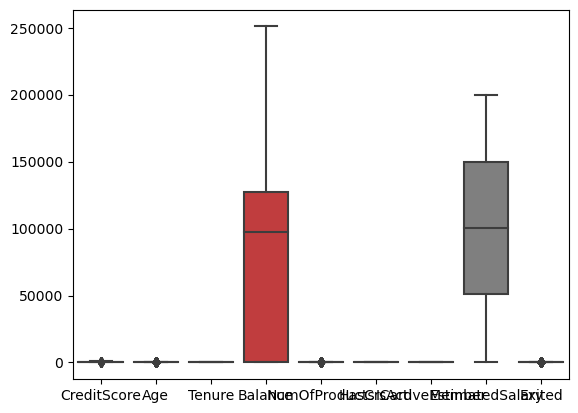

In [6]:
sns.boxplot(data=df)

* No oultiers

#### Label Encoding

In [7]:
number = df[df.select_dtypes(include=[np.number]).columns.tolist()]
number.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1


In [8]:
Float = df[df.select_dtypes(include=[float]).columns.tolist()]
Float.head(3)

,Balance,EstimatedSalary
0,0.00,101348.88
1,83807.86,112542.58
2,159660.80,113931.57


In [9]:
Qualitative = df[df.select_dtypes(include=[object]).columns.tolist()]
Qualitative.head(3)

,Gender
0,Female
1,Female
2,Female


In [10]:
from sklearn.preprocessing import LabelEncoder
Qualitative = Qualitative.apply(LabelEncoder().fit_transform)
Qualitative.head(3)

,Gender
0,0
1,0
2,0


In [11]:
combine = pd.concat([Float,Qualitative,number],axis=1)
combine.head(3)

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.00,101348.88,0,619,42,2,0.00,1,1,1,101348.88,1
1,83807.86,112542.58,0,608,41,1,83807.86,1,0,1,112542.58,0
2,159660.80,113931.57,0,502,42,8,159660.80,3,1,0,113931.57,1


#### Data Partition/Splitting

In [12]:
from sklearn.model_selection import train_test_split

x = combine.drop(['Exited'],axis=1)
y = combine[['Exited']]


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=231)

#### Train dataset

In [13]:
train = pd.concat([X_train,y_train],axis=1)
train.head(3)

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9254,0.00,179093.26,1,686,32,6,0.00,2,1,1,179093.26,0
5757,148884.47,90967.37,1,681,32,3,148884.47,2,1,1,90967.37,0
7306,0.00,46395.21,0,837,38,2,0.00,2,1,1,46395.21,0


#### Test dataset

In [14]:
test = pd.concat([X_test,y_test],axis=1)
test.head(3)

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6568,172192.49,136902.01,1,724,54,8,172192.49,1,1,1,136902.01,0
5321,110942.90,172576.56,1,732,25,0,110942.90,1,0,0,172576.56,0
6874,0.00,2305.27,1,798,28,3,0.00,2,1,0,2305.27,0


### Model

#### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output = logreg.fit(X_train, y_train) 

#### Prediction on train data

In [16]:
train["Predicted"] = output.predict(X_train)
train.head(3)


,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
9254,0.00,179093.26,1,686,32,6,0.00,2,1,1,179093.26,0,0
5757,148884.47,90967.37,1,681,32,3,148884.47,2,1,1,90967.37,0,0
7306,0.00,46395.21,0,837,38,2,0.00,2,1,1,46395.21,0,0


#### Classification Report on Train Data

In [17]:
from sklearn.metrics import classification_report
print(classification_report(train['Exited'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5572
           1       0.00      0.00      0.00      1428

    accuracy                           0.80      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.63      0.80      0.71      7000



* Accuracy of train = 80%

#### Prediction on test Data

In [18]:
test["Predicted"] = output.predict(X_test)
test.head(3)

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
6568,172192.49,136902.01,1,724,54,8,172192.49,1,1,1,136902.01,0,0
5321,110942.90,172576.56,1,732,25,0,110942.90,1,0,0,172576.56,0,0
6874,0.00,2305.27,1,798,28,3,0.00,2,1,0,2305.27,0,0


#### classification Report on train data

In [19]:
print(classification_report(test['Exited'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2391
           1       0.00      0.00      0.00       609

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.64      0.80      0.71      3000



* Accuracy of test = 80%

### Decision Tree

In [20]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()  
dt.fit(X_train,y_train) 

DecisionTreeClassifier()

In [21]:
independent_variable = list(train.columns[1:])
independent_variable

['EstimatedSalary',
 'Gender',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Predicted']

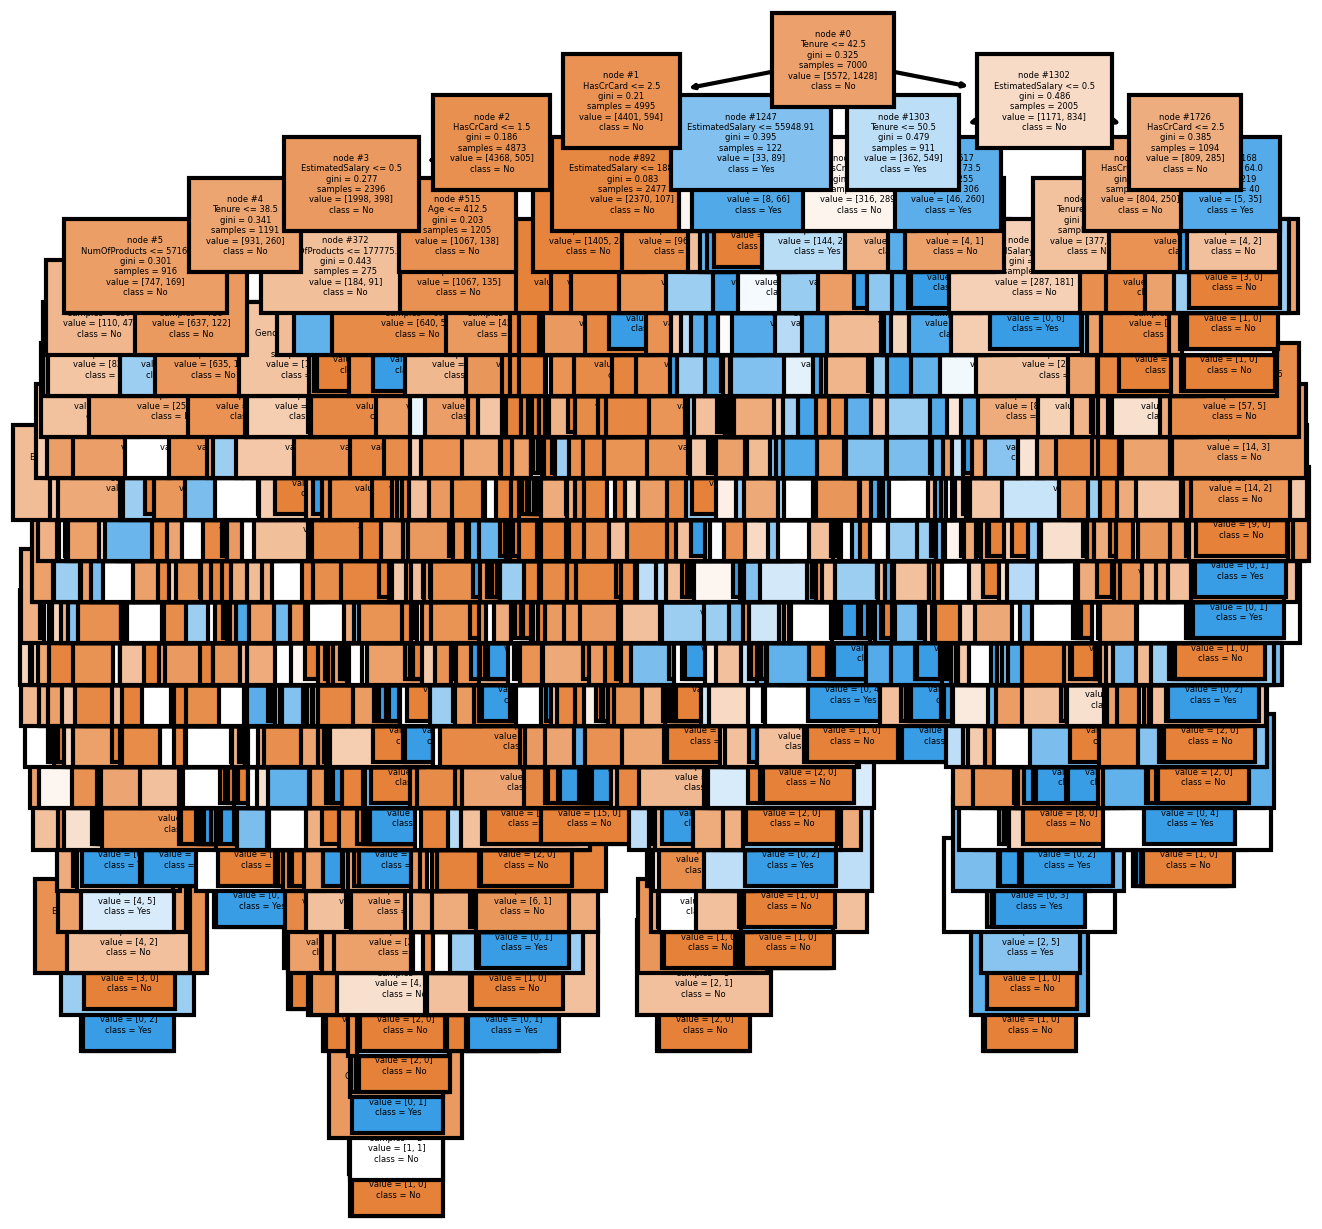

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

Exited = ['No', 'Yes'] 

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt,  
               feature_names = independent_variable, 
               class_names = Exited,
               filled = True, 
              node_ids=True, 
              fontsize=2); 

#### Prediction on train data

In [23]:
train1 = pd.concat([X_train,y_train],axis=1)
train1.head(3)

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9254,0.00,179093.26,1,686,32,6,0.00,2,1,1,179093.26,0
5757,148884.47,90967.37,1,681,32,3,148884.47,2,1,1,90967.37,0
7306,0.00,46395.21,0,837,38,2,0.00,2,1,1,46395.21,0


In [24]:
train1["Predicted"] = dt.predict(X_train)
train1.head(3)

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
9254,0.00,179093.26,1,686,32,6,0.00,2,1,1,179093.26,0,0
5757,148884.47,90967.37,1,681,32,3,148884.47,2,1,1,90967.37,0,0
7306,0.00,46395.21,0,837,38,2,0.00,2,1,1,46395.21,0,0


In [25]:
print(classification_report(train1["Predicted"],train1["Exited"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5572
           1       1.00      1.00      1.00      1428

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



* Accuracy of train = 100%

* here we get 100% accuracy means its overfitting
* we have to use Prunning method to reduce overfitting

#### Prunning

In [26]:
dt = tree.DecisionTreeClassifier(criterion='gini',      #splitter
                                 min_samples_leaf=25,   #child
                                 min_samples_split=100, #parent 
                                 max_depth=4)           #branches

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=25, min_samples_split=100)

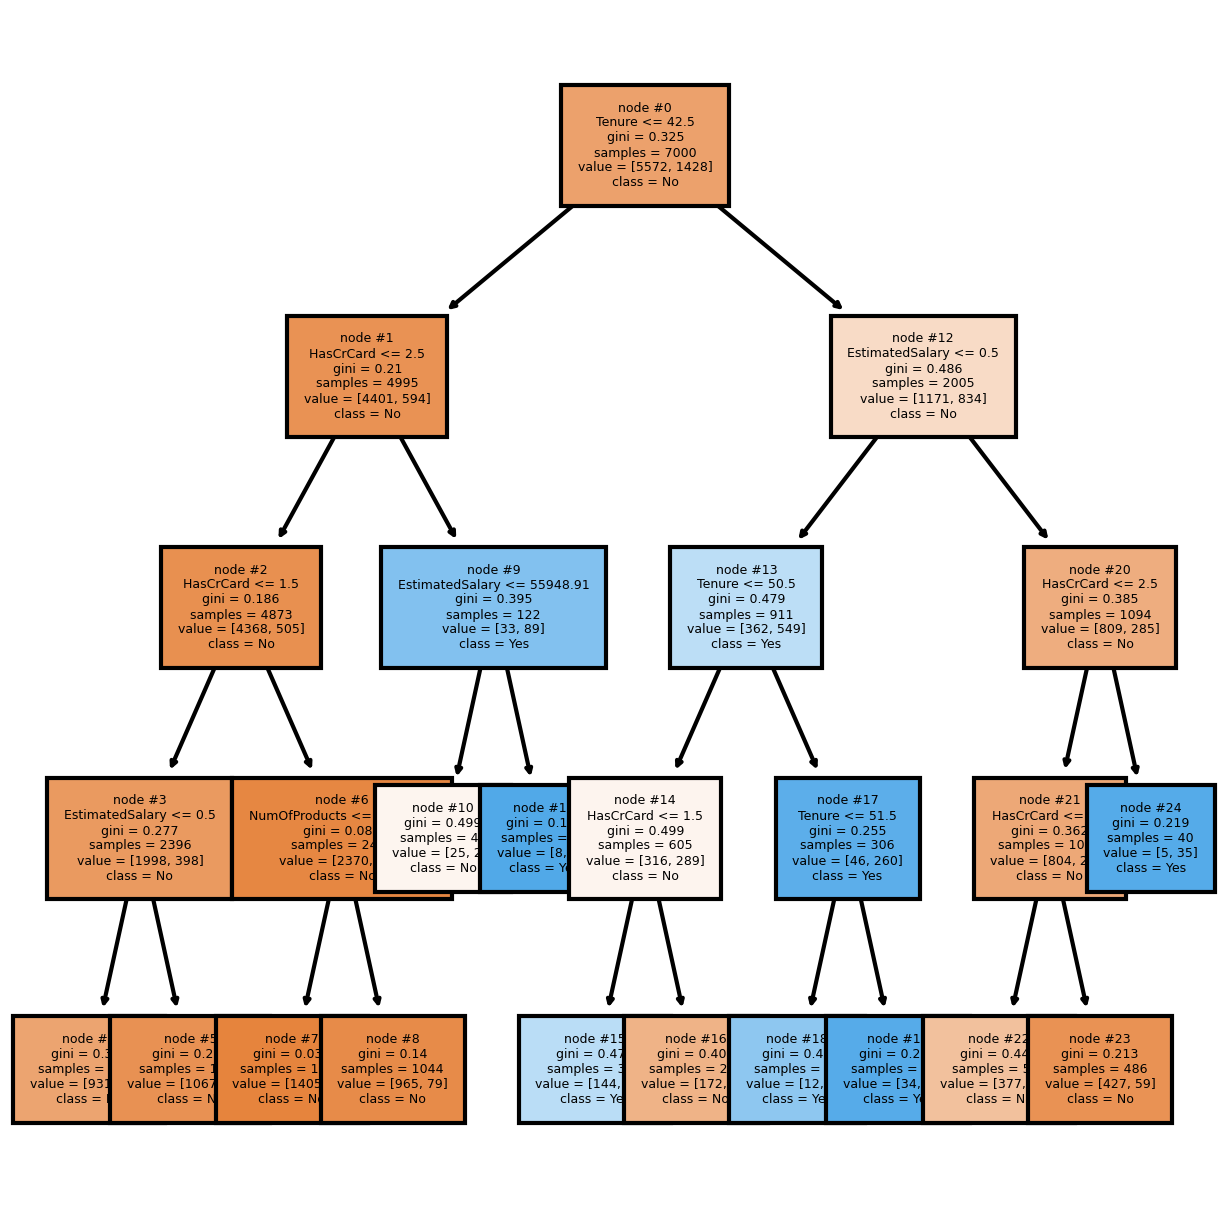

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

Excited =['No', 'Yes'] 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(dt,  
               feature_names = independent_variable,  
               class_names = Excited, 
               filled = True,
               node_ids = True,
               fontsize=3); 

#### Prediction on train data after Prunning

In [28]:
train1["Predicted"] = dt.predict(X_train)
train1.head(3)


,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
9254,0.00,179093.26,1,686,32,6,0.00,2,1,1,179093.26,0,0
5757,148884.47,90967.37,1,681,32,3,148884.47,2,1,1,90967.37,0,0
7306,0.00,46395.21,0,837,38,2,0.00,2,1,1,46395.21,0,0


In [29]:
print(classification_report(train1["Predicted"],train1["Exited"]))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      6215
           1       0.41      0.74      0.53       785

    accuracy                           0.85      7000
   macro avg       0.69      0.80      0.72      7000
weighted avg       0.90      0.85      0.87      7000



* Accuracy of train after Pruning  85% 

#### Prediction on test data

In [30]:
test1 = pd.concat([X_test,y_test],axis=1)
test1.head(3)

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6568,172192.49,136902.01,1,724,54,8,172192.49,1,1,1,136902.01,0
5321,110942.90,172576.56,1,732,25,0,110942.90,1,0,0,172576.56,0
6874,0.00,2305.27,1,798,28,3,0.00,2,1,0,2305.27,0


In [31]:
test1["Predicted"] = dt.predict(X_test)
test1.head()

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predicted
6568,172192.49,136902.01,1,724,54,8,172192.49,1,1,1,136902.01,0,0
5321,110942.90,172576.56,1,732,25,0,110942.90,1,0,0,172576.56,0,0
6874,0.00,2305.27,1,798,28,3,0.00,2,1,0,2305.27,0,0
9783,96252.98,104263.82,0,601,49,4,96252.98,2,1,0,104263.82,0,0
8152,0.00,146652.11,0,654,36,2,0.00,2,1,1,146652.11,0,0


In [32]:
print(classification_report(test1["Predicted"],test1["Exited"]))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2672
           1       0.40      0.73      0.51       328

    accuracy                           0.85      3000
   macro avg       0.68      0.80      0.71      3000
weighted avg       0.90      0.85      0.87      3000



* Accuracy of test data 85%

### Naiive Bayes

#### Model

In [33]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
#Create a Gaussian Classifier
model= BernoulliNB(alpha=0)  # Laplace smoothing (alpha) = 0 

#Train the model using the training sets
model.fit(X_train, y_train)

BernoulliNB(alpha=0)

#### Prediction on train data

In [34]:
train2=pd.concat([X_train,y_train],axis=1)
train2.head()

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9254,0.00,179093.26,1,686,32,6,0.00,2,1,1,179093.26,0
5757,148884.47,90967.37,1,681,32,3,148884.47,2,1,1,90967.37,0
7306,0.00,46395.21,0,837,38,2,0.00,2,1,1,46395.21,0
9135,96296.78,190457.87,0,727,49,7,96296.78,1,1,0,190457.87,1
6142,0.00,20734.81,0,755,38,1,0.00,2,1,0,20734.81,0


In [35]:
train2['Probability']=model.predict_proba(X_train)[:,1]
train2['Predicted']=np.where(train2['Probability'] >= 0.7,1,0)  #thershold  >0.7
train2.head()

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Probability,Predicted
9254,0.00,179093.26,1,686,32,6,0.00,2,1,1,179093.26,0,0.044205,0
5757,148884.47,90967.37,1,681,32,3,148884.47,2,1,1,90967.37,0,0.157997,0
7306,0.00,46395.21,0,837,38,2,0.00,2,1,1,46395.21,0,0.070604,0
9135,96296.78,190457.87,0,727,49,7,96296.78,1,1,0,190457.87,1,0.424135,0
6142,0.00,20734.81,0,755,38,1,0.00,2,1,0,20734.81,0,0.153643,0


#### Classification Report of train data

In [36]:
print(classification_report(train2['Exited'], train2['Predicted']))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      5572
           1       0.00      0.00      0.00      1428

    accuracy                           0.80      7000
   macro avg       0.40      0.50      0.44      7000
weighted avg       0.63      0.80      0.71      7000



* Accuracy of train data 80%

#### Prediction on test data

In [37]:
test2=pd.concat([X_test,y_test],axis=1)
test2.head()

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6568,172192.49,136902.01,1,724,54,8,172192.49,1,1,1,136902.01,0
5321,110942.90,172576.56,1,732,25,0,110942.90,1,0,0,172576.56,0
6874,0.00,2305.27,1,798,28,3,0.00,2,1,0,2305.27,0
9783,96252.98,104263.82,0,601,49,4,96252.98,2,1,0,104263.82,0
8152,0.00,146652.11,0,654,36,2,0.00,2,1,1,146652.11,0


In [38]:
test2['Probability']=model.predict_proba(X_test)[:,1]
test2['Predicted']=np.where(test2['Probability'] >= 0.7,1,0)  #thershold  >0.7
test2.head()

,Balance,EstimatedSalary,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Probability,Predicted
6568,172192.49,136902.01,1,724,54,8,172192.49,1,1,1,136902.01,0,0.157997,0
5321,110942.90,172576.56,1,732,25,0,110942.90,1,0,0,172576.56,0,0.360202,0
6874,0.00,2305.27,1,798,28,3,0.00,2,1,0,2305.27,0,0.099521,0
9783,96252.98,104263.82,0,601,49,4,96252.98,2,1,0,104263.82,0,0.424135,0
8152,0.00,146652.11,0,654,36,2,0.00,2,1,1,146652.11,0,0.070604,0


In [39]:
print(classification_report(test2['Exited'], test2['Predicted']))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2391
           1       0.00      0.00      0.00       609

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.64      0.80      0.71      3000



* Accuracy of test data 80%

### Gradient Boosting

#### Model Building

In [40]:
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

In [41]:
from sklearn.ensemble import GradientBoostingClassifier  

In [43]:
from sklearn.model_selection import GridSearchCV
# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="mse")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=10,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='mse',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [44]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.6, 'max_depth': 3, 'min_samples_leaf': 100, 'min_samples_split': 50, 'n_estimators': 5}


In [47]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.6, min_samples_leaf=100,
                           min_samples_split=50, n_estimators=5)

In [48]:
# Prediction
train_pred = final_mod_GBM.predict(X_train)
test_pred = final_mod_GBM.predict(X_test)

#### Classification report of train data

In [49]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      5572
           1       0.76      0.43      0.55      1428

    accuracy                           0.86      7000
   macro avg       0.81      0.70      0.73      7000
weighted avg       0.85      0.86      0.84      7000



* Accuracy of train data 86%

#### Classification report of test data

In [50]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      2391
           1       0.76      0.43      0.55       609

    accuracy                           0.86      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.85      0.86      0.84      3000



* Accuracy of test data 86%

Used Algorithm :

    1. logistic Regression 
       train accuracy : 80%
       test accuracy : 80%
       
    2. Decision Tree 
       train accuracy : 85%
       test accuracy : 85%
       
    3. Naiive Bayes
       train accuracy : 80%
       test accuracy : 80%
       
    4. Gradient Boosting
       train accuracy : 86%
       test accuracy : 86%
       
       

* Best Model for the Churn Prediction Dataset from used algorithm: **Gradient Boosting**,**Decision Tree**

## END